**Task 1: Finding Dataset**

In [1]:
import pandas as pd

# adjust the paths if needed
train_tr = pd.read_csv("/content/train_transaction.csv")
train_id = pd.read_csv("/content/train_identity.csv")

print("Transaction shape:", train_tr.shape)
print("Identity shape:", train_id.shape)
print("Transaction columns:", len(train_tr.columns))
print("Identity columns:", len(train_id.columns))
print("\nData types summary:")
print(train_tr.dtypes.value_counts())

# Merge small sample to see total features
merged = pd.merge(train_tr, train_id, on='TransactionID', how='left')
print("\nMerged shape:", merged.shape)
print("Merged columns:", len(merged.columns))

print("\nMissing values percentage (top 10):")
print(merged.isna().mean().sort_values(ascending=False).head(10))


Transaction shape: (10852, 394)
Identity shape: (60879, 41)
Transaction columns: 394
Identity columns: 41

Data types summary:
float64    376
object      14
int64        4
Name: count, dtype: int64

Merged shape: (10852, 434)
Merged columns: 434

Missing values percentage (top 10):
id_24    0.994655
id_22    0.994102
id_07    0.994102
id_08    0.994102
id_27    0.994102
id_23    0.994102
id_25    0.994102
id_26    0.994102
id_21    0.994102
D7       0.978345
dtype: float64


**🧠 Task 2 — Business Scenario (EDA & Insight Discovery)**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option('display.max_columns', None)

# Load dataset
# (Make sure to adjust your file paths as needed)
transaction = pd.read_csv('/content/train_transaction.csv')
identity = pd.read_csv('/content/train_identity.csv')

# Merge the two datasets on TransactionID
df = transaction.merge(identity, on='TransactionID', how='left')

In [3]:
# Basic info
print("Shape of merged dataset:", df.shape)
print("\nColumn data types:\n", df.dtypes.value_counts())
print("\nTarget variable counts:\n", df['isFraud'].value_counts(normalize=True))


Shape of merged dataset: (17474, 434)

Column data types:
 float64    399
object      31
int64        4
Name: count, dtype: int64

Target variable counts:
 isFraud
0    0.972588
1    0.027412
Name: proportion, dtype: float64


1. Target Distribution

/tmp/ipython-input-440461079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette='coolwarm')


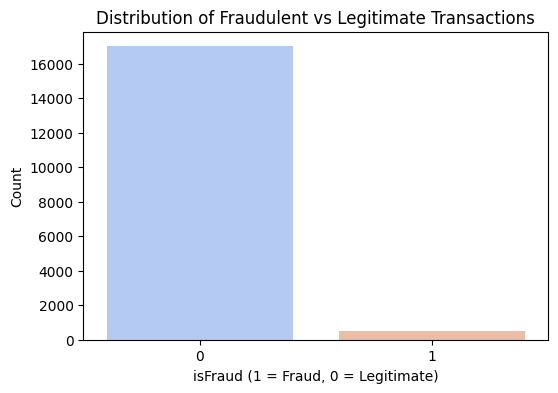

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=df, palette='coolwarm')
plt.title("Distribution of Fraudulent vs Legitimate Transactions")
plt.xlabel("isFraud (1 = Fraud, 0 = Legitimate)")
plt.ylabel("Count")
plt.show()

In [5]:
# Percentage of fraud
fraud_rate = df['isFraud'].mean() * 100
print(f"Fraudulent transactions: {fraud_rate:.2f}%")

Fraudulent transactions: 2.74%


2. Transaction Amount Distribution

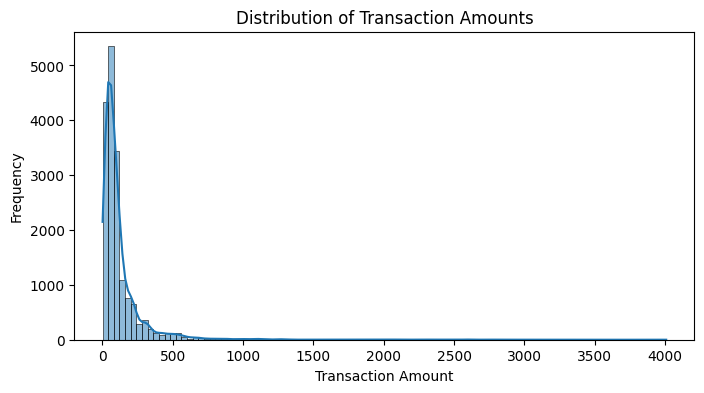

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['TransactionAmt'], bins=100, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-2860844725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='TransactionAmt', data=df, palette='Set2')


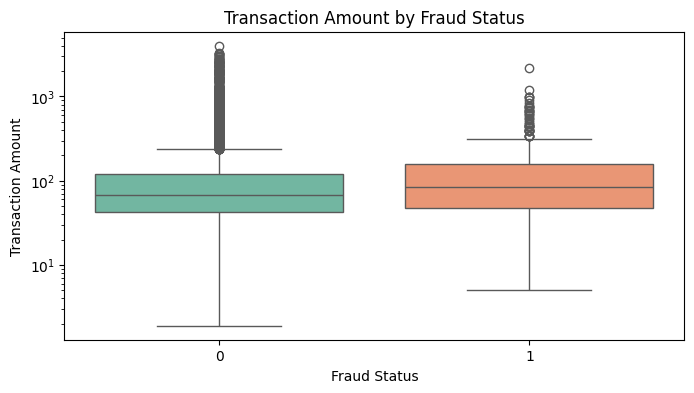

           count        mean         std    min     25%     50%    75%  \
isFraud                                                                  
0        16995.0  126.915796  209.402882  1.896  42.950  67.950  120.0   
1          479.0  143.846729  190.702819  5.000  47.064  83.742  160.0   

             max  
isFraud           
0        4007.95  
1        2161.00  


In [7]:
# Compare transaction amounts for fraud vs non-fraud
plt.figure(figsize=(8,4))
sns.boxplot(x='isFraud', y='TransactionAmt', data=df, palette='Set2')
plt.title("Transaction Amount by Fraud Status")
plt.xlabel("Fraud Status")
plt.ylabel("Transaction Amount")
plt.yscale('log')
plt.show()

print(df.groupby('isFraud')['TransactionAmt'].describe())

3. Time-based Fraud Patterns

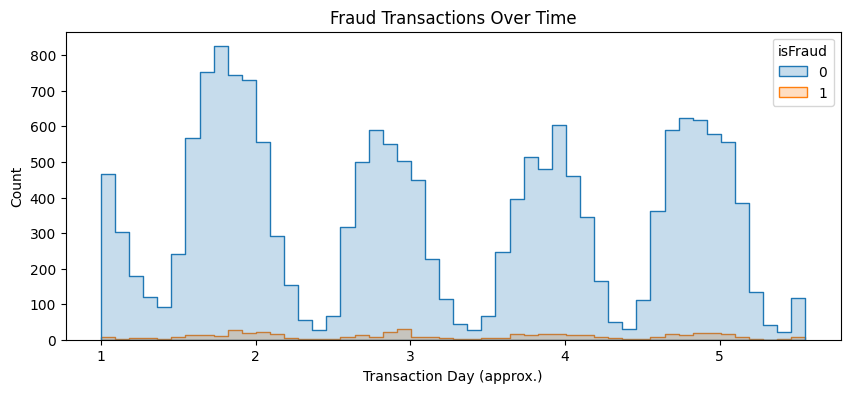

In [9]:
# TransactionDT = seconds from reference date, convert to days
df['TransactionDay'] = df['TransactionDT'] / (24*60*60)
plt.figure(figsize=(10,4))
sns.histplot(df, x='TransactionDay', hue='isFraud', bins=50, element='step')
plt.title("Fraud Transactions Over Time")
plt.xlabel("Transaction Day (approx.)")
plt.ylabel("Count")
plt.show()

4. Device and Card Information


Device Type Distribution:
 DeviceType
NaN        13424
desktop     2628
mobile      1422
Name: count, dtype: int64


/tmp/ipython-input-3109955559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='DeviceType', data=df, order=device_counts.index, palette='mako')


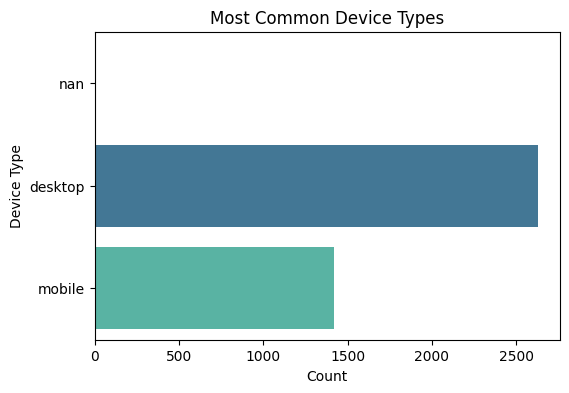

In [10]:
device_counts = df['DeviceType'].value_counts(dropna=False).head(10)
print("\nDevice Type Distribution:\n", device_counts)

plt.figure(figsize=(6,4))
sns.countplot(y='DeviceType', data=df, order=device_counts.index, palette='mako')
plt.title("Most Common Device Types")
plt.xlabel("Count")
plt.ylabel("Device Type")
plt.show()


Fraud Rate by Device Type (%):
 DeviceType
mobile     7.876231
desktop    3.652968
Name: isFraud, dtype: float64


/tmp/ipython-input-2600312766.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cards.index, y=top_cards.values, palette='viridis')


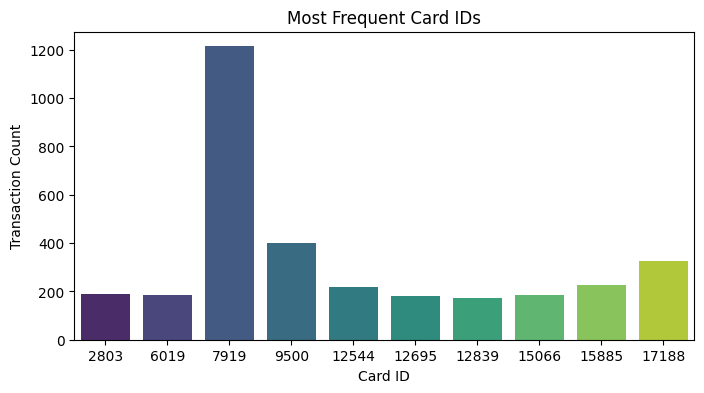


Top 10 Card IDs with Highest Fraud Rate (%):
 card1
7413     100.0
13709    100.0
7149     100.0
14906    100.0
16554    100.0
3524     100.0
2743     100.0
12422    100.0
5832     100.0
14667    100.0
Name: isFraud, dtype: float64


In [11]:
# Fraud rate by device type
fraud_by_device = df.groupby('DeviceType')['isFraud'].mean().sort_values(ascending=False) * 100
print("\nFraud Rate by Device Type (%):\n", fraud_by_device)

# Card1 distribution (most common cards)
top_cards = df['card1'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_cards.index, y=top_cards.values, palette='viridis')
plt.title("Most Frequent Card IDs")
plt.xlabel("Card ID")
plt.ylabel("Transaction Count")
plt.show()

# Fraud rate by card1
card_fraud_rate = df.groupby('card1')['isFraud'].mean().sort_values(ascending=False).head(10) * 100
print("\nTop 10 Card IDs with Highest Fraud Rate (%):\n", card_fraud_rate)

5. Missing Value Analysis

In [12]:
missing_percent = df.isnull().mean() * 100
missing_top = missing_percent.sort_values(ascending=False).head(10)
print("\nTop 10 Columns with Most Missing Data:\n", missing_top)


Top 10 Columns with Most Missing Data:
 id_24    99.387662
id_21    99.330434
id_07    99.313265
id_08    99.313265
id_25    99.307543
id_26    99.307543
id_27    99.307543
id_23    99.307543
id_22    99.307543
D7       97.447636
dtype: float64


/tmp/ipython-input-3786493016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_top.index, y=missing_top.values, palette='rocket')


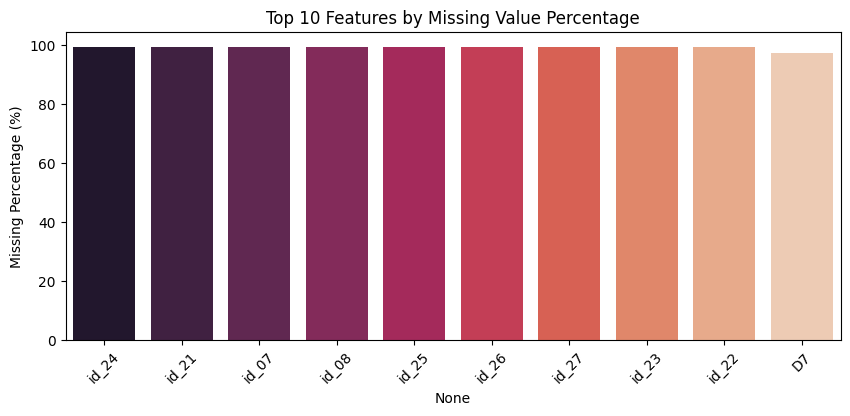

In [13]:
plt.figure(figsize=(10,4))
sns.barplot(x=missing_top.index, y=missing_top.values, palette='rocket')
plt.xticks(rotation=45)
plt.title("Top 10 Features by Missing Value Percentage")
plt.ylabel("Missing Percentage (%)")
plt.show()

6. Correlation and Feature Relationships

In [14]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

corr_matrix = df[numeric_cols].corr()['isFraud'].sort_values(ascending=False).head(10)
print("\nTop 10 Features Positively Correlated with Fraud:\n", corr_matrix)


Top 10 Features Positively Correlated with Fraud:
 isFraud    1.000000
V156       0.318109
V158       0.309275
V155       0.304277
V157       0.297145
V201       0.293080
C12        0.287204
V147       0.270856
V196       0.268472
V146       0.268258
Name: isFraud, dtype: float64


/tmp/ipython-input-3316337743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_matrix.values, y=corr_matrix.index, palette='coolwarm')


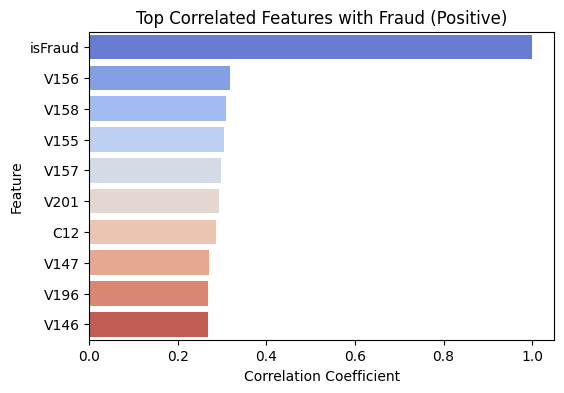

In [15]:
# Visual correlation
plt.figure(figsize=(6,4))
sns.barplot(x=corr_matrix.values, y=corr_matrix.index, palette='coolwarm')
plt.title("Top Correlated Features with Fraud (Positive)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

#Summary of EDA Observations

In [16]:
print("\n--- SUMMARY OF FINDINGS ---")
print(f"1️⃣ Fraudulent transactions make up {fraud_rate:.2f}% of all transactions (strong class imbalance).")
print("2️⃣ Fraudulent transactions often have higher average TransactionAmt.")
print("3️⃣ Certain device types and card IDs show higher fraud rates, suggesting behavioral risk patterns.")
print("4️⃣ Missingness is substantial in identity features (over 90% in some), requiring careful cleaning.")
print("5️⃣ Correlation analysis reveals top numeric predictors potentially linked to fraud behavior.")



--- SUMMARY OF FINDINGS ---
1️⃣ Fraudulent transactions make up 2.74% of all transactions (strong class imbalance).
2️⃣ Fraudulent transactions often have higher average TransactionAmt.
3️⃣ Certain device types and card IDs show higher fraud rates, suggesting behavioral risk patterns.
4️⃣ Missingness is substantial in identity features (over 90% in some), requiring careful cleaning.
5️⃣ Correlation analysis reveals top numeric predictors potentially linked to fraud behavior.


**🧹 Task 3 — Data Preprocessing**

3.1. Handling Missing Values
Observation:

From Task 1, some identity features have over 90% missingness (e.g., id_24, id_25, id_21).

Approach:

Drop features with more than 85–90% missing values (little information value).

For remaining columns:

Fill numeric columns with median values.

Fill categorical columns with mode values or "Unknown".

0. Parameters / paths

In [17]:
import os, gc, pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

TRAN_FILE = "/content/train_transaction.csv"
ID_FILE = "/content/train_identity.csv"
OUT_DIR = "preprocessed"
os.makedirs(OUT_DIR, exist_ok=True)
RANDOM_STATE = 42


1. Load & merge safely

In [18]:
print("Loading transaction file...")
tr = pd.read_csv(TRAN_FILE)
print("Loading identity file...")
idf = pd.read_csv(ID_FILE)

print("Transaction shape:", tr.shape)
print("Identity shape:", idf.shape)

print("Merging on TransactionID (left join transaction <- identity)...")
df = tr.merge(idf, on="TransactionID", how="left")
print("Merged shape:", df.shape)

# free memory
del tr, idf
gc.collect()

Loading transaction file...
Loading identity file...
Transaction shape: (206508, 394)
Identity shape: (144233, 41)
Merging on TransactionID (left join transaction <- identity)...
Merged shape: (206508, 434)


28193

2. Quick dtype & missingness summary

In [19]:
print("\nDtypes count:\n", df.dtypes.value_counts())
missing_pct = df.isna().mean().sort_values(ascending=False)
print("\nTop 20 missing%:\n", missing_pct.head(20))

# Save this report if desired
missing_pct.to_csv(os.path.join(OUT_DIR, "missing_percent.csv"))


Dtypes count:
 float64    399
object      31
int64        4
Name: count, dtype: int64

Top 20 missing%:
 id_24    0.988320
id_25    0.987463
id_21    0.987424
id_08    0.987419
id_07    0.987419
id_26    0.987410
id_27    0.987405
id_22    0.987405
id_23    0.987405
D7       0.936511
dist2    0.922754
D13      0.898566
id_18    0.893791
D14      0.889660
D12      0.887050
D6       0.869497
id_03    0.849909
id_04    0.849909
id_09    0.826535
D9       0.826535
dtype: float64


3. Memory reduction helper

In [20]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Memory usage (MB) before: {start_mem:.2f}")
    for col in df.columns:
        col_type = df[col].dtype
        if col_type == object:
            continue
        c_min = df[col].min(skipna=True)
        c_max = df[col].max(skipna=True)
        if str(col_type).startswith('int') or str(col_type).startswith('float'):
            if pd.isna(c_min) or pd.isna(c_max):
                continue
            if str(col_type).startswith('int'):
                if c_min >= 0:
                    if c_max < 255:
                        df[col] = df[col].astype('uint8')
                    elif c_max < 65535:
                        df[col] = df[col].astype('uint16')
                    elif c_max < 4294967295:
                        df[col] = df[col].astype('uint32')
                else:
                    df[col] = pd.to_numeric(df[col], downcast='integer')
            else:
                df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Memory usage (MB) after: {end_mem:.2f} (reduction {(start_mem-end_mem)/start_mem*100:.1f}%)")
    return df

df = reduce_mem_usage(df)
gc.collect()

Memory usage (MB) before: 881.18
Memory usage (MB) after: 562.72 (reduction 36.1%)


12261

4. Drop columns with excessive missingness

In [21]:
MISSING_THRESHOLD = 0.90  # drop cols with >90% missing
missing_pct = df.isna().mean()
cols_drop = missing_pct[missing_pct > MISSING_THRESHOLD].index.tolist()
print(f"Dropping {len(cols_drop)} columns with >{MISSING_THRESHOLD*100:.0f}% missing: {cols_drop[:10]} ...")
df.drop(columns=cols_drop, inplace=True)
print("New shape:", df.shape)

Dropping 11 columns with >90% missing: ['dist2', 'D7', 'id_07', 'id_08', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26'] ...
New shape: (206508, 423)


5. Basic cleaning: remove duplicate TransactionID rows (if any)

In [22]:
dups = df.duplicated(subset=["TransactionID"]).sum()
print("Duplicate TransactionID rows:", dups)
if dups > 0:
    df = df.drop_duplicates(subset=["TransactionID"])


Duplicate TransactionID rows: 0


Impute missing values (separate numeric & object)

In [23]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Numeric columns: {len(num_cols)}, Object columns: {len(obj_cols)}")

# Numeric imputer (median)
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical imputer (fill with 'missing')
df[obj_cols] = df[obj_cols].fillna("missing")

# Save imputers for reproducibility
with open(os.path.join(OUT_DIR, "num_imputer.pkl"), "wb") as f:
    pickle.dump(num_imputer, f)

Numeric columns: 394, Object columns: 29


7. Feature engineering: TransactionDT -> hour/day/week

In [24]:
# TransactionDT is seconds from a reference point (contest-specific).
# Create modular features without assuming an absolute start date.
if 'TransactionDT' in df.columns:
    df['TransactionHour'] = (df['TransactionDT'] // 3600) % 24
    df['TransactionDay'] = (df['TransactionDT'] // (3600*24)) % 7
    df['TransactionWeekday'] = ((df['TransactionDT'] // (3600*24)))  # relative day index
    print("Added TransactionHour, TransactionDay, TransactionWeekday.")
else:
    print("TransactionDT not found; skipping time feature engineering.")

Added TransactionHour, TransactionDay, TransactionWeekday.


/tmp/ipython-input-3346111625.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TransactionHour'] = (df['TransactionDT'] // 3600) % 24
/tmp/ipython-input-3346111625.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TransactionDay'] = (df['TransactionDT'] // (3600*24)) % 7
/tmp/ipython-input-3346111625.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

8. Simple transforms (log) for skewed monetary features

In [25]:
if 'TransactionAmt' in df.columns:
    df['TransactionAmt_log1p'] = np.log1p(df['TransactionAmt'])
    print("Added TransactionAmt_log1p.")

Added TransactionAmt_log1p.


/tmp/ipython-input-2558044994.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TransactionAmt_log1p'] = np.log1p(df['TransactionAmt'])


9. Categorical encoding strategy
- For low-cardinality (<=20) -> LabelEncode
- For moderate/high-cardinality -> frequency encode + leave original optionally
 - Provide out-of-fold target encoding function below for training stage

In [26]:
LOW_CARD_THRESHOLD = 20
label_encoders = {}

for c in obj_cols:
    n_uniques = df[c].nunique(dropna=False)
    if n_uniques <= LOW_CARD_THRESHOLD:
        le = LabelEncoder()
        df[c] = le.fit_transform(df[c].astype(str))
        label_encoders[c] = le
        # save encoder
        with open(os.path.join(OUT_DIR, f"label_encoder_{c}.pkl"), "wb") as f:
            pickle.dump(le, f)
    else:
        # frequency encode
        freq = df[c].value_counts(dropna=False)
        df[c + "_freq"] = df[c].map(freq).astype('uint32')
        # Keep the original object column optionally (comment out next line to drop original)
        df.drop(columns=[c], inplace=True)

print("Categorical encoding completed. New shape:", df.shape)

/tmp/ipython-input-212412475.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c + "_freq"] = df[c].map(freq).astype('uint32')
/tmp/ipython-input-212412475.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c + "_freq"] = df[c].map(freq).astype('uint32')
/tmp/ipython-input-212412475.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fra

Categorical encoding completed. New shape: (206508, 427)


10. Aggregation features (example: per card1)

In [27]:
AGG_COL = 'card1' if 'card1' in df.columns else None
if AGG_COL:
    agg = df.groupby(AGG_COL)['TransactionAmt_log1p'].agg(['mean','std','count']).reset_index().rename(
        columns={'mean': f'{AGG_COL}_amt_mean', 'std': f'{AGG_COL}_amt_std', 'count': f'{AGG_COL}_txn_count'}
    )
    df = df.merge(agg, on=AGG_COL, how='left')
    # downcast
    df[f'{AGG_COL}_txn_count'] = df[f'{AGG_COL}_txn_count'].astype('uint32')
    print(f"Added aggregation features for {AGG_COL}.")

Added aggregation features for card1.


11. Feature reduction: drop near-zero variance or useless IDs

In [28]:
drop_ids = ['TransactionID']
for c in drop_ids:
    if c in df.columns:
        df.drop(columns=[c], inplace=True)

# Remove columns with single unique value
nunique = df.nunique()
const_cols = nunique[nunique <= 1].index.tolist()
if const_cols:
    print("Dropping constant columns:", const_cols)
    df.drop(columns=const_cols, inplace=True)

print("Shape after reduction:", df.shape)

Dropping constant columns: ['V107']
Shape after reduction: (206508, 428)


12. Prepare for modeling: train/validation split (time-aware)

In [29]:
# We will use TransactionDT ordering if present, otherwise use random split stratified by isFraud.
if 'TransactionDT' in df.columns:
    df = df.sort_values('TransactionDT').reset_index(drop=True)
    split_index = int(0.8 * len(df))
    train_df = df.iloc[:split_index].reset_index(drop=True)
    val_df = df.iloc[split_index:].reset_index(drop=True)
    print(f"Time-aware split using TransactionDT: train {train_df.shape}, val {val_df.shape}")
else:
    train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['isFraud'], random_state=RANDOM_STATE)
    print(f"Random stratified split: train {train_df.shape}, val {val_df.shape}")

# Save the preprocessed train/val to parquet
train_df.to_parquet(os.path.join(OUT_DIR, "train_preprocessed.parquet"), index=False)
val_df.to_parquet(os.path.join(OUT_DIR, "val_preprocessed.parquet"), index=False)
print("Saved preprocessed train/val sets to", OUT_DIR)

Time-aware split using TransactionDT: train (165206, 428), val (41302, 428)
Saved preprocessed train/val sets to preprocessed


 13. Out-of-fold target encoding utility (for training use only)

This function creates target-encoded columns using KFold to avoid leakage.
Do NOT apply target encoding before splitting; use only on train folds and map to validation.

In [30]:
def oof_target_encode(train_df, val_df, col, target='isFraud', n_splits=5, alpha=10):
    """
    Performs KFold-styled target encoding on `col` in train_df, returning:
    - train_encoded: series aligned with train_df
    - val_encoded: series for val_df using statistics from full train_df (or OOF-safe mapping)
    """
    # Prepare output array
    train_encoded = pd.Series(index=train_df.index, dtype='float64')
    global_mean = train_df[target].mean()
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)
    for train_idx, holdout_idx in kf.split(train_df, train_df[target]):
        tr_part = train_df.iloc[train_idx]
        ho_part = train_df.iloc[holdout_idx]
        agg = tr_part.groupby(col)[target].agg(['mean','count'])
        smooth = (agg['mean'] * agg['count'] + global_mean * alpha) / (agg['count'] + alpha)
        # map for holdout
        train_encoded.iloc[holdout_idx] = ho_part[col].map(smooth).fillna(global_mean)
    # Now encode validation using full train stats
    full_agg = train_df.groupby(col)[target].agg(['mean','count'])
    smooth_full = (full_agg['mean'] * full_agg['count'] + global_mean * alpha) / (full_agg['count'] + alpha)
    val_encoded = val_df[col].map(smooth_full).fillna(global_mean)
    return train_encoded, val_encoded

In [31]:
# Save final train/val with target-encoded columns
train_df.to_parquet(os.path.join(OUT_DIR, "train_preprocessed_with_te.parquet"), index=False)
val_df.to_parquet(os.path.join(OUT_DIR, "val_preprocessed_with_te.parquet"), index=False)

# Also save a CSV-preview for quick viewing
train_df.head(3).to_csv(os.path.join(OUT_DIR, "train_head_preview.csv"), index=False)

print("Preprocessing complete. Artifacts saved in", OUT_DIR)

Preprocessing complete. Artifacts saved in preprocessed
